Keltz K. "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

# Business and Data Understanding 

Trying to figure out of the current K-State Football Season Ticket holders who are likely to renew and who are likely to defect. Once we find who will likely defect we will call them and try to convince them to renew to keep up the season ticket sales.

# Data Processing

In [1]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.neural_network import MLPClassifier


#ensemble classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_auc_score, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

C:\Users\Kinsey\Documents\Senior Year\Spring\Data Mining\New folder\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#uploading data set
df=pd.read_excel("train_test_dataset.xlsx")
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,NaN,0,1,NaN,,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,,,NaN,0,0,NaN,1,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,NaN,0,1,0.0,,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,,1,1,0.0,1,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,,1,1,0.0,,65,194


In [3]:
#checking the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 19 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         9216 non-null object
INCOME      9216 non-null object
CHILD       4549 non-null object
GNDR        9216 non-null object
OWNHOME     9216 non-null object
SPORT       4273 non-null float64
COMP        9216 non-null object
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(1), int64(11), object(7)
memory usage: 1.3+ MB


In [4]:
#Checking for null values
df.isnull().sum()

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE            0
INCOME         0
CHILD       4667
GNDR           0
OWNHOME        0
SPORT       4943
COMP           0
PCTMARR        0
HOMEVAL        0
dtype: int64

In [5]:
#replacing fake null values with real null values
df = df.replace(r'\s+', np.nan, regex=True)
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94.0,4.0,NaN,0.0,1.0,NaN,NaN,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,NaN,NaN,NaN,0.0,0.0,NaN,1.0,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67.0,2.0,NaN,0.0,1.0,0.0,NaN,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62.0,4.0,NaN,1.0,1.0,0.0,1.0,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89.0,4.0,NaN,1.0,1.0,0.0,NaN,65,194


In [6]:
#rechecking null values for accurate count
df.isnull().sum()

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE         1993
INCOME      1944
CHILD       8634
GNDR         498
OWNHOME     1999
SPORT       4943
COMP        8207
PCTMARR        0
HOMEVAL        0
dtype: int64

In [7]:
#decding which columns to drop: child, sport, and comp
df = df.drop('CHILD', axis=1)
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94.0,4.0,0.0,1.0,NaN,NaN,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,NaN,NaN,0.0,0.0,NaN,1.0,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67.0,2.0,0.0,1.0,0.0,NaN,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62.0,4.0,1.0,1.0,0.0,1.0,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89.0,4.0,1.0,1.0,0.0,NaN,65,194


In [8]:
df = df.drop('SPORT', axis=1)
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94.0,4.0,0.0,1.0,NaN,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,NaN,NaN,0.0,0.0,1.0,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67.0,2.0,0.0,1.0,NaN,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62.0,4.0,1.0,1.0,1.0,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89.0,4.0,1.0,1.0,NaN,65,194


In [9]:
df = df.drop('COMP', axis=1)
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94.0,4.0,0.0,1.0,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,NaN,NaN,0.0,0.0,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67.0,2.0,0.0,1.0,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62.0,4.0,1.0,1.0,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89.0,4.0,1.0,1.0,65,194


In [10]:
#updating the null value list
df.isnull().sum()

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE         1993
INCOME      1944
GNDR         498
OWNHOME     1999
PCTMARR        0
HOMEVAL        0
dtype: int64

In [11]:
#getting data about gndr
df.groupby('GNDR').size()

GNDR
0.0    4819
1.0    3899
dtype: int64

In [12]:
#replacing null gndr vlaues with 0.0
df = df.fillna({'GNDR': '0.0'})
df.isnull().sum()

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE         1993
INCOME      1944
GNDR           0
OWNHOME     1999
PCTMARR        0
HOMEVAL        0
dtype: int64

In [13]:
#checking stats about age
df['AGE'].describe()

count    7223.000000
mean       61.392912
std        16.594747
min        12.000000
25%        48.000000
50%        63.000000
75%        75.000000
max        97.000000
Name: AGE, dtype: float64

In [14]:
#replacing null age values with the average age
df = df.fillna({'AGE': '61'})
df.isnull().sum()

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE            0
INCOME      1944
GNDR           0
OWNHOME     1999
PCTMARR        0
HOMEVAL        0
dtype: int64

In [15]:
#checking stats about income
df['INCOME'].describe()

count    7272.000000
mean        2.882151
std         1.843857
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: INCOME, dtype: float64

In [16]:
#replacing null income values with average income value
df = df.fillna({'INCOME': '3'})
df.isnull().sum()

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE            0
INCOME         0
GNDR           0
OWNHOME     1999
PCTMARR        0
HOMEVAL        0
dtype: int64

In [17]:
#checking ownhome stats
df['OWNHOME'].describe()

count    7217.000000
mean        0.718581
std         0.449722
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: OWNHOME, dtype: float64

In [18]:
#replacing null ownhome values with average value
df = df.fillna({'OWNHOME': '0'})
df.isnull().sum()

FAKEID      0
Y2defect    0
Y1G5        0
Y1G4        0
Y1G3        0
Y1G2        0
Y1G1        0
Y1price     0
YEARS       0
BACKER      0
AGE         0
INCOME      0
GNDR        0
OWNHOME     0
PCTMARR     0
HOMEVAL     0
dtype: int64

# Data Visualization 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010B69780>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000128AB898>]], dtype=object)

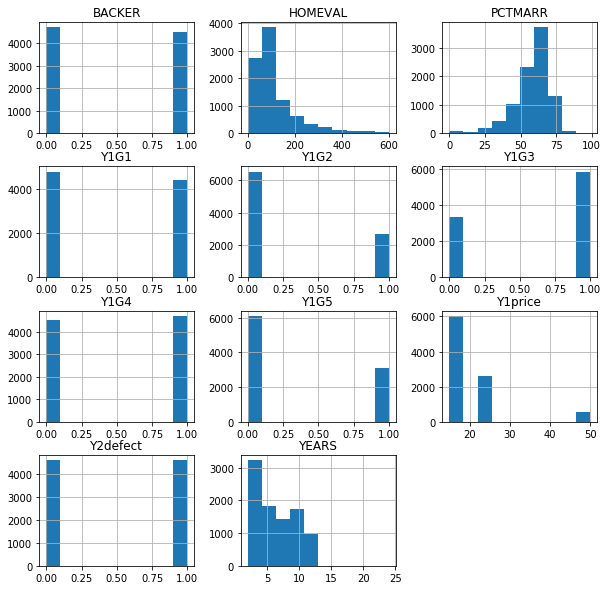

In [19]:
#histogram
df.hist(figsize=(10,10))

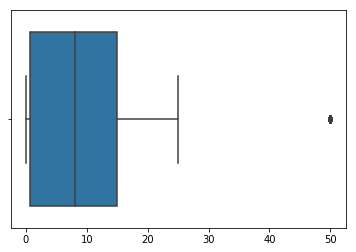

In [20]:
#boxplot
sns.boxplot([df.Y2defect, df.Y1price])

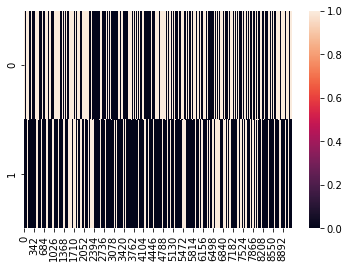

In [22]:
#heatmap
sns.heatmap([df.Y2defect, df.Y1G2])

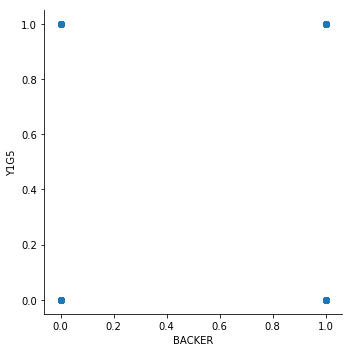

In [26]:
#scatter chart
sns.lmplot('BACKER', 'Y1G5', data=df, fit_reg=False)

# Model Development/Building

In [101]:
y = df['Y2defect']
X = df[['BACKER', 'YEARS']]

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [103]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [104]:
print metrics.accuracy_score(y_test, dt.predict(X_test))
print metrics.confusion_matrix(y_test, dt.predict(X_test))
print metrics.classification_report(y_test, dt.predict(X_test))
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.59349005425
[[1048  315]
 [ 809  593]]
             precision    recall  f1-score   support

          0       0.56      0.77      0.65      1363
          1       0.65      0.42      0.51      1402

avg / total       0.61      0.59      0.58      2765

0.595929669699


# Model Selection and Evaluation

In [105]:
df2 = pd.read_excel("validation_dataset.xlsx")
df2.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,NaN,0,1,0.0,,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,,0,,0.0,,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,,NaN,0,0,NaN,1,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4,1,0,1,NaN,,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4,NaN,1,1,0.0,,65,110


The column names of validation dataset must be same as those of the training-testing dataset.

In [109]:
validation = df2[['BACKER', 'YEARS']]
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 2 columns):
BACKER    9542 non-null int64
YEARS     9542 non-null int64
dtypes: int64(2)
memory usage: 149.2 KB


In [110]:
fakeid = pd.DataFrame(df2['FAKEID'])
fakeid.head()

,FAKEID
0,580D24RR
1,179Q96NO
2,050Z45TB
3,399V18KY
4,009A52KP


In [111]:
# applying the decision tree model to validation dataset
output_scoring = dt.predict(validation)

# generating probability for defect for each fan
probs = dt.predict_proba(validation)
probs = pd.DataFrame(probs, columns=['prob of Renewal', 'prob of Defect'])

# joining two dataframes (fakeid and probability)
risky_fans = fakeid.join(probs)

# joining dataframes (fakeid, probability, and prediction)
predicted_y= pd.DataFrame(output_scoring, columns=['Predicted Defect'])
risky_fans = risky_fans.join(predicted_y)

# generating submission file
risky_fans.to_csv("submissionentry.csv", index=False)

In [16]:
output_scoring

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

# Final Analysis and Storytelling

from my analysis I have decided that the relationship between backer and years was the strongest and 59% of season ticket holders would renew for next season